# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the data

In [2]:
file_path = "./data/features_3_sec.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


We check for null values:

<AxesSubplot: >

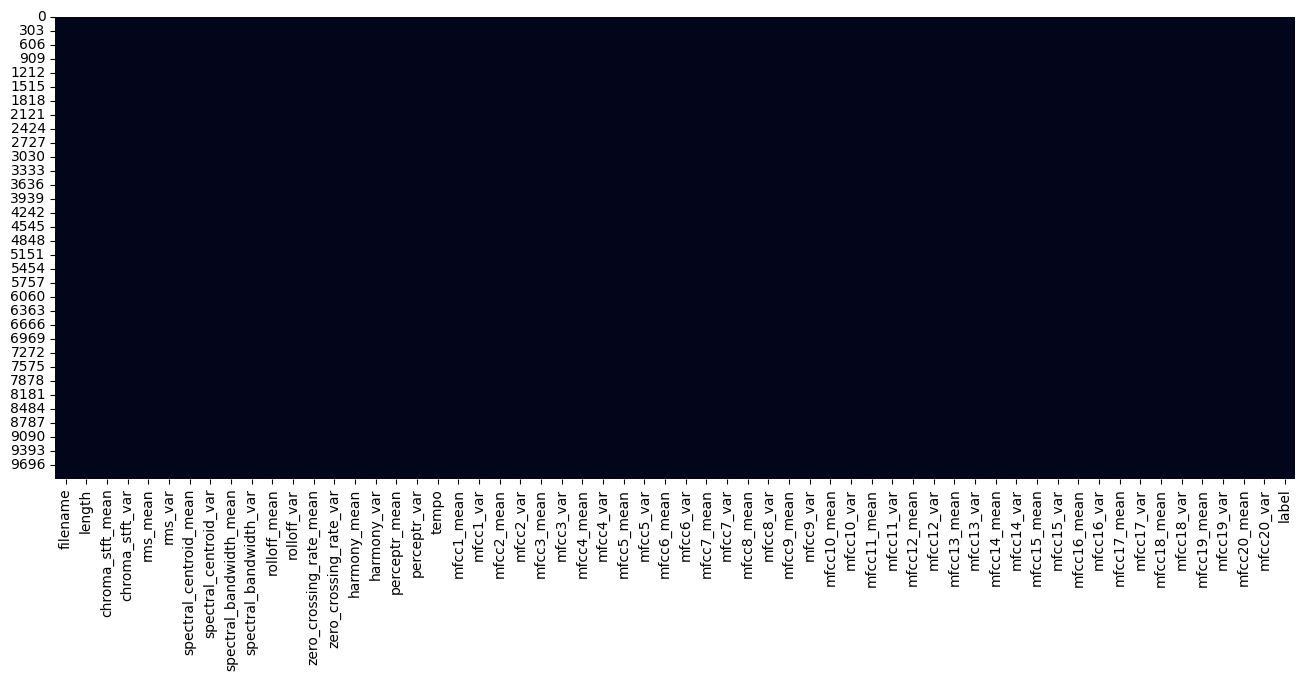

In [5]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(df.isna(), cbar=False, ax=ax)

There are no missing values. 

We proceed by looking for duplicates, by checking if all filenames are unique:

In [6]:
df["filename"].nunique()

9990

There are no duplicates.

Now we can now drop the unnecessary fields:

In [7]:
df= df.drop(['filename', 'length'], axis=1)

## Setting the correct datatypes

Now we can set the correct datatypes so that we will use less memory and speed up some computations.

In [8]:
df_num = df.select_dtypes(include="number")

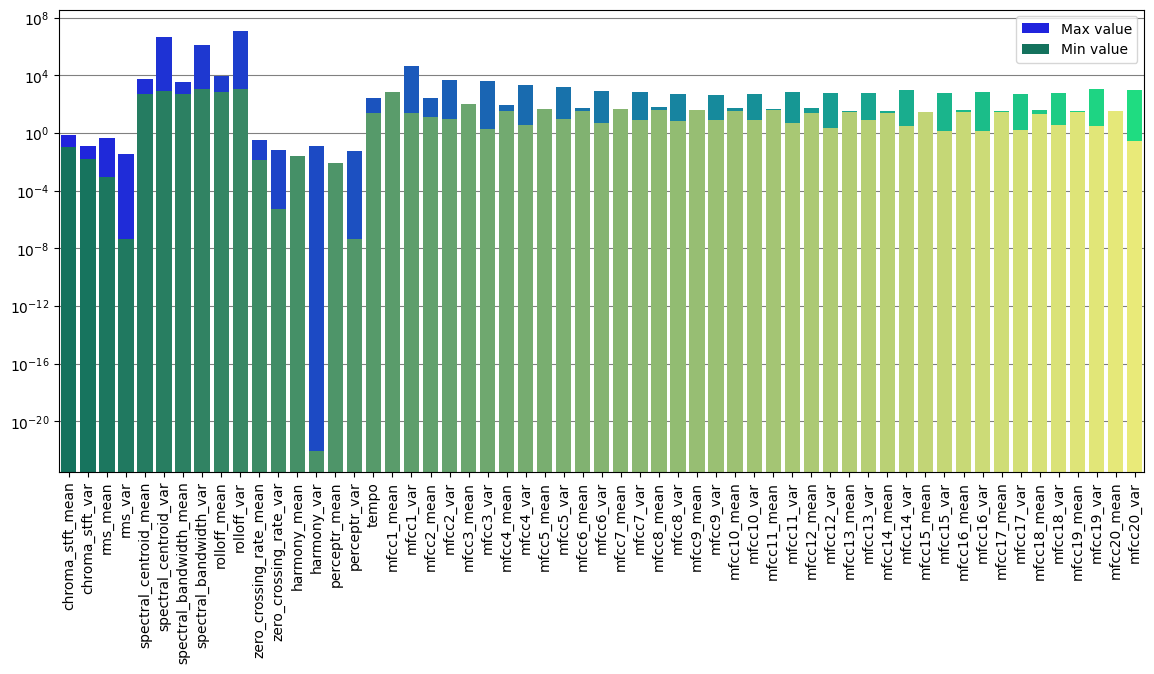

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x=df_num.columns, y=abs(df_num.max()), label="Max value", palette='winter', ax=ax)
sns.barplot(x=df_num.columns, y=abs(df_num.min()), label="Min value", palette='summer', ax=ax)
plt.xticks(rotation=90)
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.grid(axis='x', visible=False)
ax.grid(axis='y', color='gray')
ax.legend()

We can see that no features reach a value larger than $10^7$. We can safely use the `float32` datatytpe in place of `float64`.

In [10]:
np.finfo(np.float64), np.finfo(np.float32), np.finfo(np.float16)

(finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64),
 finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32),
 finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16))

Notice that we could even use `float16` for many features, but we prefer to keep the dataset homogeneous since that would save very little space.

Cconversion:

In [11]:
dtypes = {col:np.float32 for col in df.columns}
dtypes["label"] = "category"
df_new = df.astype(dtypes)

In [12]:
print(f"Initial size: {df.memory_usage(deep=True).sum() / 1024 / 1024:.3f} MB")
print(f"New size: {df_new.memory_usage(deep=True).sum() / 1024 / 1024:.3f} MB")

Initial size: 4.939 MB
New size: 2.183 MB


We were able to reduce the size in memory of the dataset by a factor of almost 2.

## Exploring the target

In [13]:
df = df_new

Now we investigate the target variable, which is `label`. It is a categorical variable therefore we will use a histogram:

<AxesSubplot: xlabel='label', ylabel='Count'>

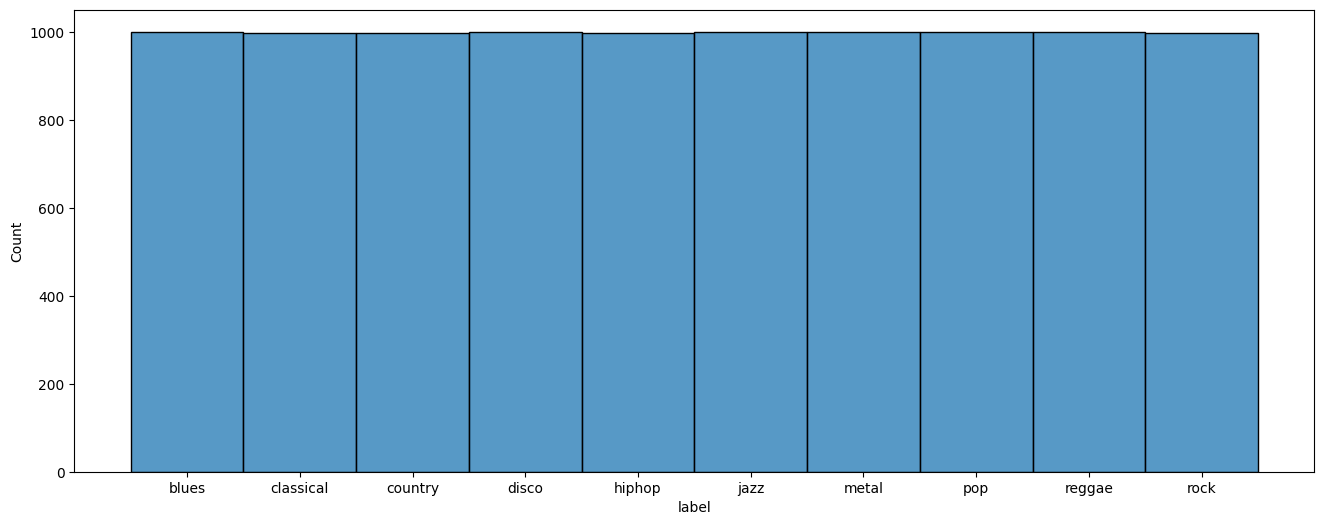

In [14]:
fig, ax = plt.subplots(figsize=(16,6))
sns.histplot(data=df, x="label", ax=ax)

We can see that classes are balanced up to a very small error. This is not an issue.

## Correlation analysis

We compute the correlation of the input features w.r.t. the target feature (i.e. the musical genre) through the [PPS](https://8080labs.com/blog/posts/rip-correlation-introducing-the-predictive-power-score-pps/):

In [15]:
import ppscore
df_cat = df.copy()
df_cat['label'] = df['label'].astype('category').cat.codes
pp_matrix = ppscore.matrix(df)
matrix_df = pp_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

<AxesSubplot: xlabel='x', ylabel='y'>

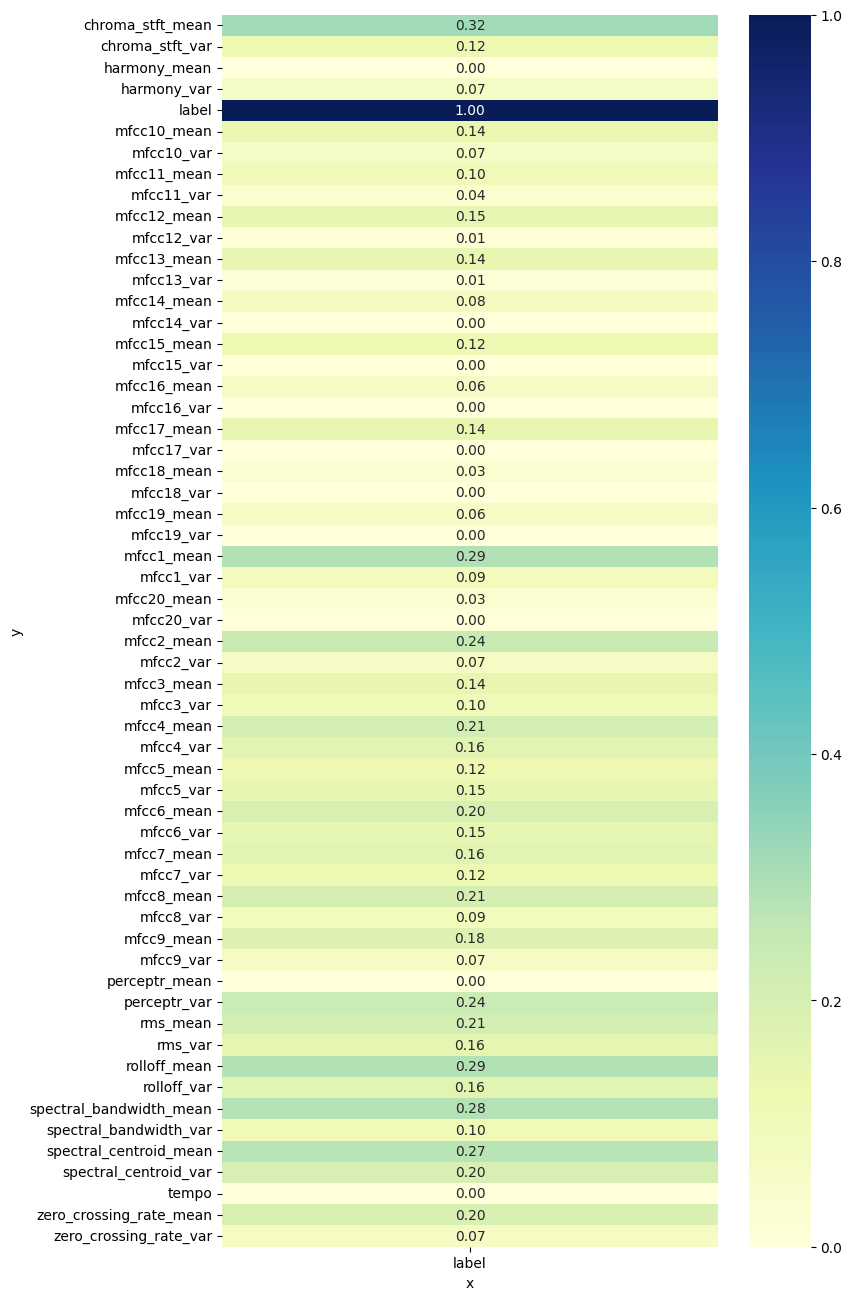

In [16]:
fig, ax = plt.subplots(figsize=(8,16))
sns.heatmap(matrix_df[['label']], annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)

Many features have a very weak correlation. We plot the feature with a reasonably high correlation below:

<AxesSubplot: xlabel='x', ylabel='y'>

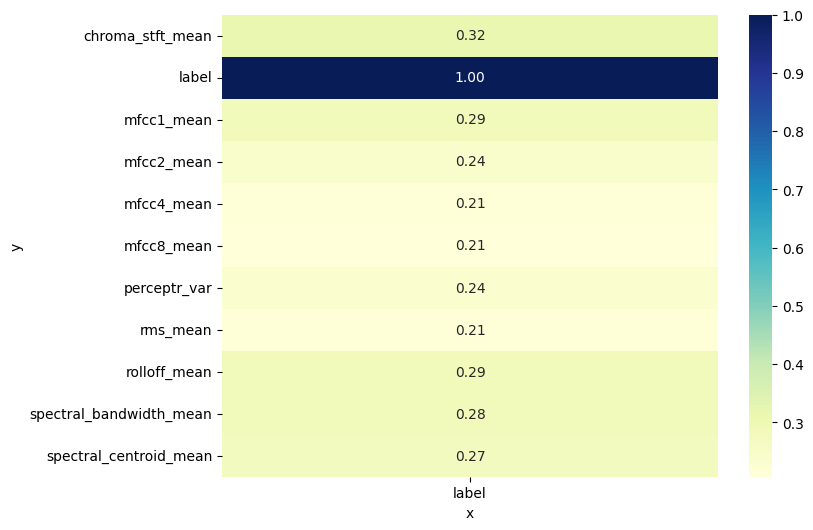

In [17]:
high_corr = matrix_df[['label']][matrix_df >= 0.20]
high_corr = high_corr.dropna()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(high_corr[['label']], annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)

If we were to perform feature selection, we will certainly keep these features. 

However, we are going to use all the features anyway since the the dataset is not that large.

## Principal Component Analysis (PCA)

In [18]:
df_numpy = df.to_numpy()
np.random.shuffle(df_numpy)
labels = df_numpy[:, -1]
A = df_numpy[:, :-1].astype(np.float32)
AT_mean = np.mean(A.T, axis=1)  
X = A.T - AT_mean[:, np.newaxis]

In [19]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
Phi = U.T @ X

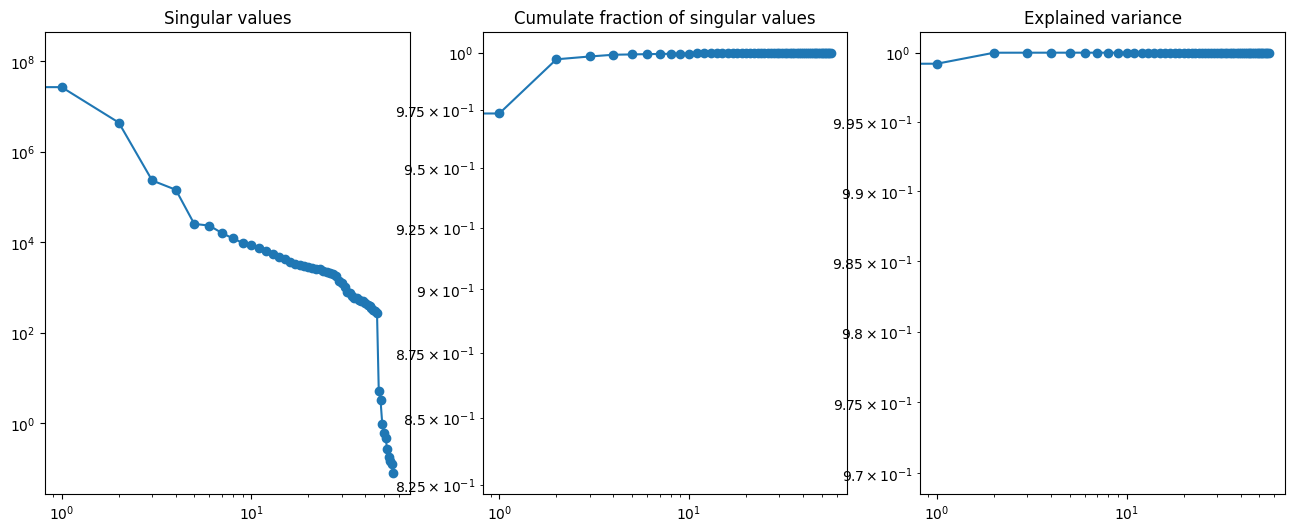

In [20]:
fig, axs = plt.subplots(1,3,figsize = (16,6))
axs[0].set_title("Singular values")
axs[0].loglog(s, "o-")

axs[1].set_title("Cumulate fraction of singular values")
# We compute the cumulative sum and we normalize it
cumulative_fraction = np.cumsum(s) / np.sum(s)
axs[1].loglog(cumulative_fraction, "o-")

axs[2].set_title("Explained variance")
explained_variance = np.cumsum(s**2) / np.sum(s**2)
axs[2].loglog(explained_variance, "o-")

In [21]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [22]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan']

In [23]:
mapping = {genre:color for genre, color in zip(genres, colors)}

2D plot:

Text(0, 0.5, '2nd\xa0principal\xa0component')

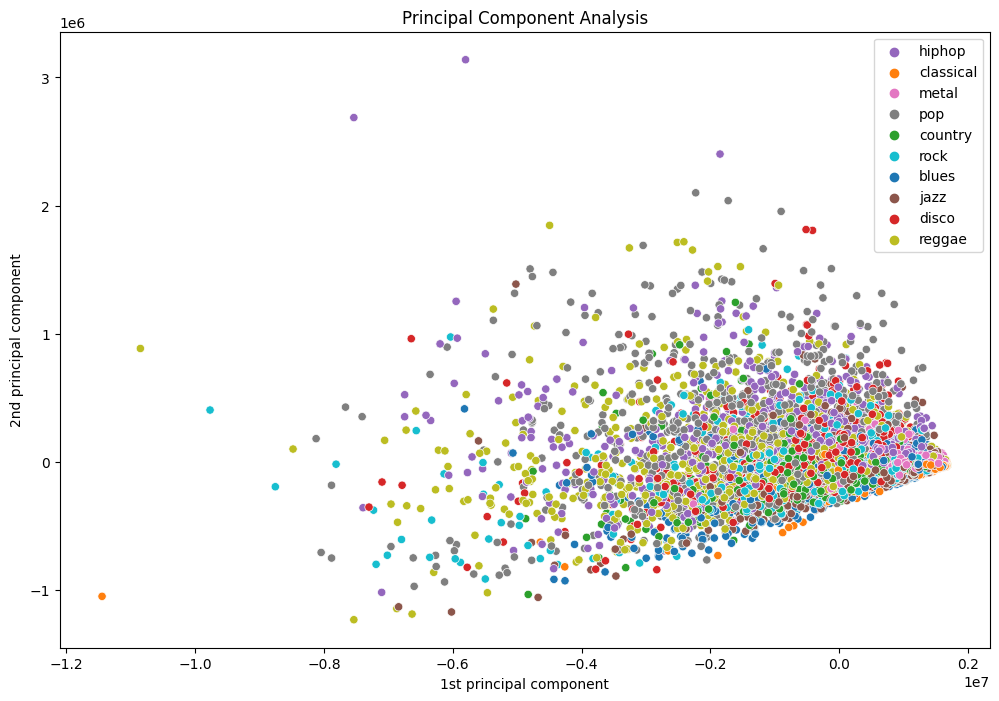

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=Phi[0,:], y=Phi[1,:], hue=labels, palette=mapping, ax=ax)
ax.set_title("Principal Component Analysis")
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')

Distribution of each class according to the first two principal directions:

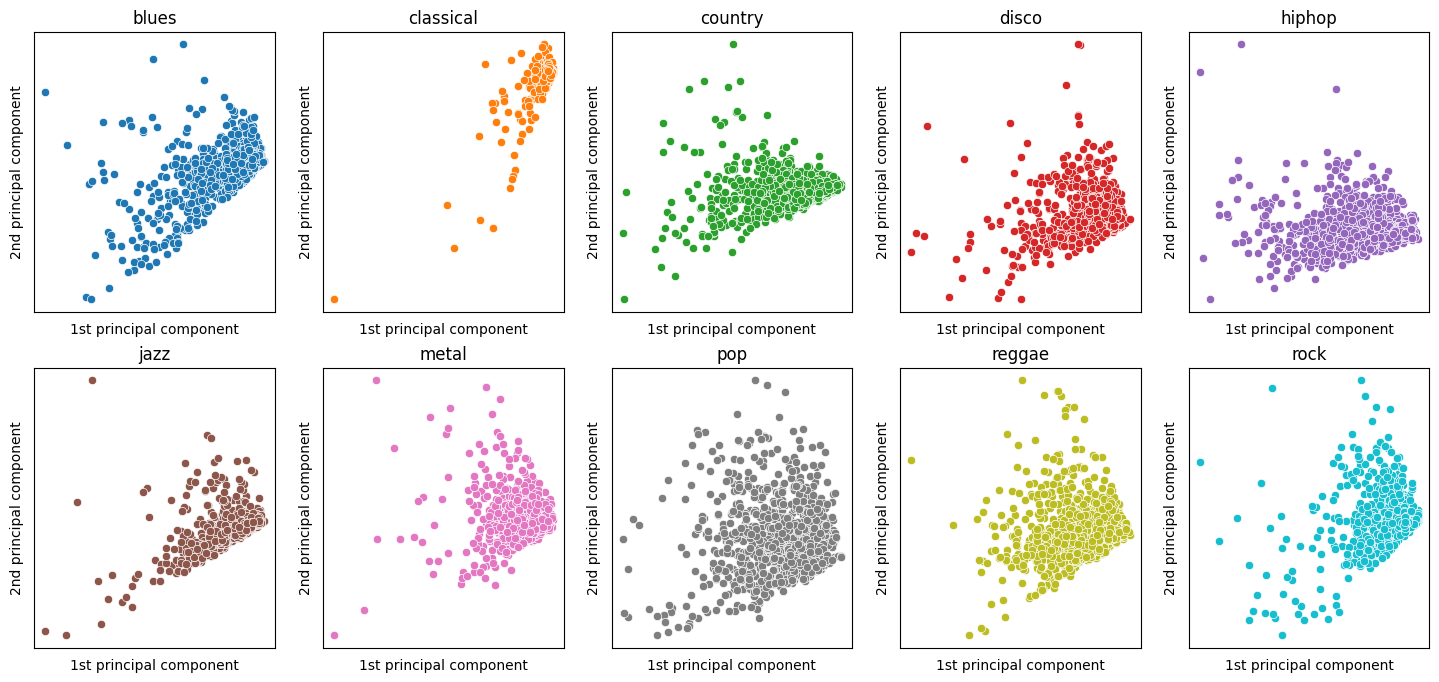

In [25]:
fig, axs = plt.subplots(2, 5, figsize=(18,8))
axs = axs.flatten()
for i in range(len(genres)):
    axs[i].set_title(genres[i])
    axs[i].set_xlabel('1st principal component')
    axs[i].set_ylabel('2nd principal component')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    mask = labels == genres[i]
    sns.scatterplot(x=Phi[0, mask], y=Phi[1, mask], color=colors[i], ax=axs[i])
    

3D plot:

Text(0.5, 0, '3rd\xa0principal\xa0component')

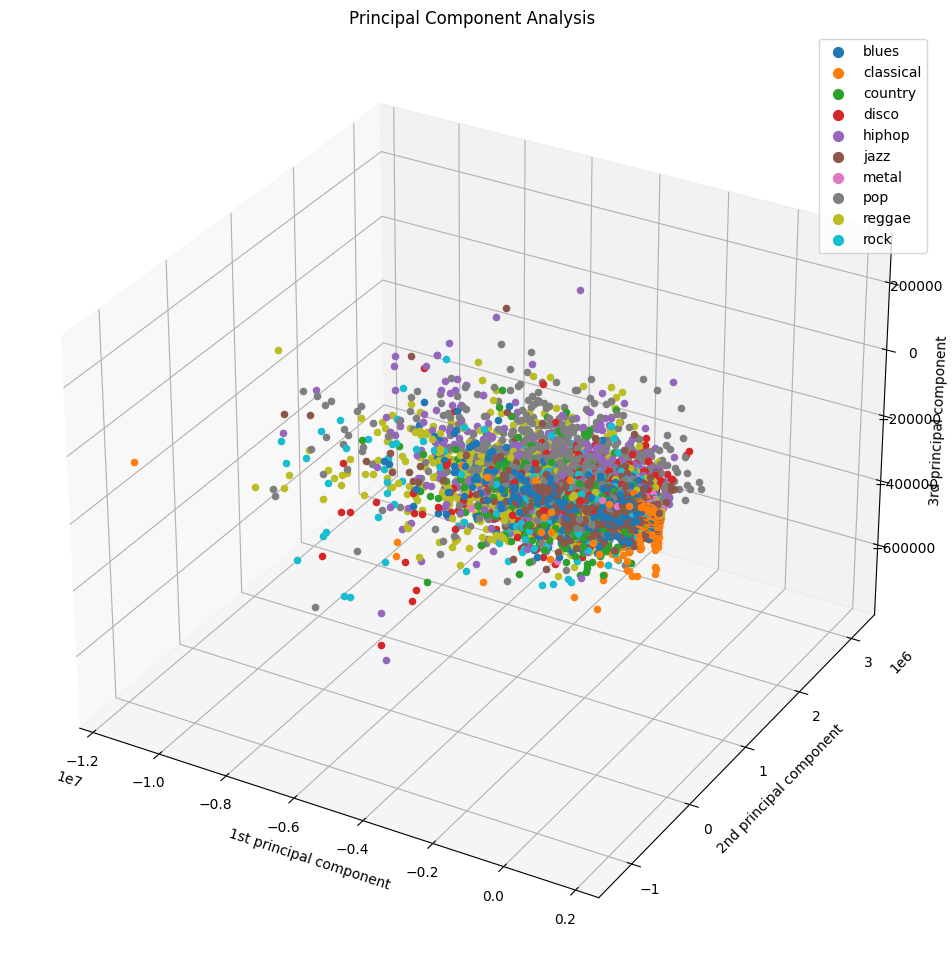

In [26]:
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    ax.scatter(Phi[0,i], Phi[1,i], Phi[2,i], color=mapping[labels[i]])

ax.legend(handles=[ax.scatter([], [], color=v, label=k, s=50) for k,v in mapping.items()])
ax.set_title("Principal Component Analysis")
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_zlabel('3rd principal component')